In [1]:
#Imports
import sys
sys.path.append('../../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata_wXYerr('../data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)
#Express as weights
weighdata = 1/v_err1

In [3]:
#keeping others but holding them constant, All Parameters
def f(r,pref,h,rho00):
     return np.sqrt(nf.bh_v(r,load=True,path='../')**2 
                    + nf.h_v(r,load=True,path='../')**2 
                    + nf.b_v(r,load=True,path='../')**2 
                    + nf.d_v(r,pref,h,rho00,load=True,path='../')**2)
    
#keeping others but holding them constant, No h
def g(r,pref):
     return np.sqrt(nf.bh_v(r,load=True,path='../')**2 
                    + nf.h_v(r,load=True,path='../')**2 
                    + nf.b_v(r,load=True,path='../')**2 
                    + nf.d_v(r,pref,load=True,path='../')**2)

#Only Disk, All Parameters
def d(r,pref,h,rho00):
    return nf.d_v(r,pref,h,rho00,load=True,path='../')

#Only Disk, No h
def d2(r,pref):
    return nf.d_v(r,pref,load=True,path='../')

In [4]:
#Fit, Keeping rest constant, All Parameters

#Setup
l_mod = lm.Model(f)
l_params = l_mod.make_params()
#Disk Params
l_params.add('h', value=nf.h_c, min=0, max=1000)
l_params.add('rho00',value=nf.drho00_c,min=0)
l_params.add('pref', value=nf.pref_def, min=0)
#Do fit
l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

In [5]:
#Fit, Keeping rest constant, No h

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Disk Params
g_params.add('pref', value=1, min=0)
#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat,weights=weighdata)

In [6]:
#Fit, D Only, All Parameters

#Setup
d_mod = lm.Model(d)
d_params = d_mod.make_params()
#Disk Params
d_params.add('h', value=nf.h_c, min=0, max=1000)
d_params.add('pref', value=1, min=0)
#Do fit
d_fit = d_mod.fit(v_dat,d_params,r=r_dat,weights=weighdata)

In [7]:
#Fit, D Only, No h

#Setup
d2_mod = lm.Model(d2)
d2_params = d2_mod.make_params()
#Disk Params
d2_params.add('pref', value=1, min=0)
#Do fit
d2_fit = d2_mod.fit(v_dat,d2_params,r=r_dat,weights=weighdata)

In [8]:
#Define curves to plot

best_l = l_fit.best_fit
l_dict = l_fit.best_values
l_h = l_dict['h']
l_pref = l_dict['pref']
l_rho00 = l_dict['rho00']

best_g = g_fit.best_fit
g_dict = g_fit.best_values
g_pref = g_dict['pref']

best_d = d_fit.best_fit

best_2 = d2_fit.best_fit

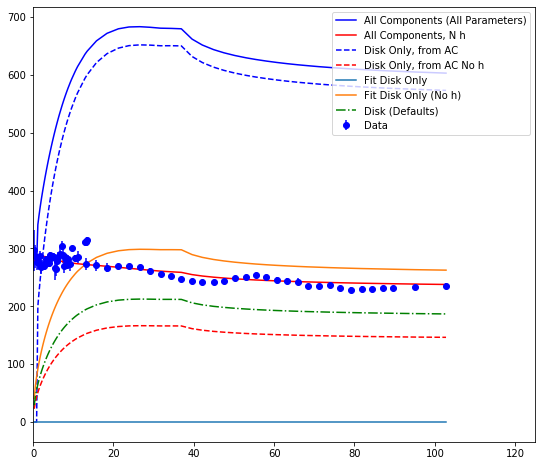

In [9]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,125)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,best_l,'b-',label='All Components (All Parameters)')
plt.plot(r_dat,best_g,'r-',label='All Components, N h')
plt.plot(r_dat,d(r_dat,l_pref,l_h,l_rho00),'b--',label='Disk Only, from AC')
plt.plot(r_dat,d2(r_dat,g_pref),'r--',label='Disk Only, from AC No h')
plt.plot(r_dat,best_d,label='Fit Disk Only')
plt.plot(r_dat,best_2,label='Fit Disk Only (No h)')
plt.plot(r_dat,nf.d_v(r_dat,path='../'),'g-.',label='Disk (Defaults)')

plt.legend()
plt.show()

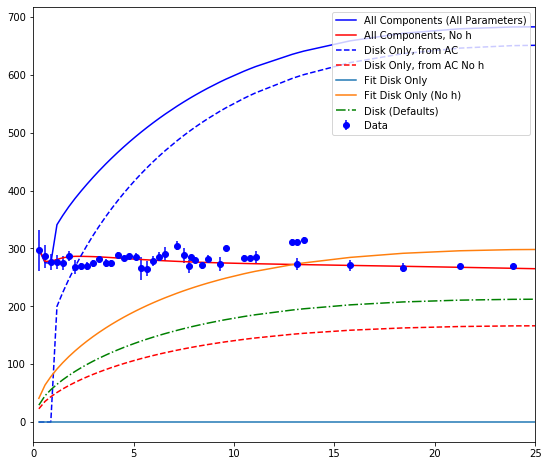

In [10]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,25)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,best_l,'b-',label='All Components (All Parameters)')
plt.plot(r_dat,best_g,'r-',label='All Components, No h')
plt.plot(r_dat,d(r_dat,l_pref,l_h,l_rho00),'b--',label='Disk Only, from AC')
plt.plot(r_dat,d2(r_dat,g_pref),'r--',label='Disk Only, from AC No h')
plt.plot(r_dat,best_d,label='Fit Disk Only')
plt.plot(r_dat,best_2,label='Fit Disk Only (No h)')
plt.plot(r_dat,nf.d_v(r_dat,path='../'),'g-.',label='Disk (Defaults)')

plt.legend()
plt.show()

In [11]:
print('Fit information for all-component fit (All Parameters):')
l_fit

Fit information for all-component fit (All Parameters):


In [12]:
print('Fit information for all-component fit (No h):')
g_fit

Fit information for all-component fit (No h):


In [13]:
print('Fit information for single-component fit (All Parameters):')
d_fit

Fit information for single-component fit (All Parameters):


In [14]:
print('Fit information for single-component fit (No h):')
d2_fit

Fit information for single-component fit (No h):


In [15]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())

Total Time:
1.3816030025482178 seconds

Timestamp:
2020-04-18 14:49:26.983379
